## Lecture5: Data Cleansing and Feature Engineering

---
* Author:  [Yuttapong Mahasittiwat](mailto:khala1391@gmail.com)
* Technologist | Data Modeler | Data Analyst
* [YouTube](https://www.youtube.com/khala1391)
* [LinkedIn](https://www.linkedin.com/in/yuttapong-m/)
---

## Source
- File:
  - [**Flight Delay**](https://www.kaggle.com/datasets/haithemhermessi/usda-national-nutrient-database/data?select=train.csv)<br>
  - **ATM data**
  - [**HR attrition**](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)<br>
  - [**Bank Data**](https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets)<br>
- Source: [**CPE352 Data Science** by **Santitham**](https://youtu.be/hCV8Qr2RO1w?si=nIrUgDWrvdQQVsuM)

In [5]:
import numpy as np
import pandas as pd
print("numpy version :",np.__version__)
print("pandas version :",pd.__version__)

numpy version : 1.26.4
pandas version : 2.2.1


In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
print("matplotlib version :",mpl.__version__)

matplotlib version : 3.8.4


In [8]:
from PIL import Image
from IPython.display import display

In [11]:
import datetime
print(f"Last updated: {datetime.datetime.now()}")

Last updated: 2024-07-31 23:30:42.803282


## Data1 (Flight Delay): Import Data

In [52]:
df = pd.read_csv('data/flights.csv')
df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

In [54]:
df.isna().any()

id                False
year              False
month             False
day               False
dep_time           True
sched_dep_time    False
dep_delay          True
arr_time           True
sched_arr_time    False
arr_delay          True
carrier           False
flight            False
tailnum            True
origin            False
dest              False
air_time           True
distance          False
hour              False
minute            False
time_hour         False
name              False
dtype: bool

In [55]:
df[df['dep_time'].isna()]

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
838,838,2013,1,1,NaN,1630,NaN,NaN,1815,NaN,...,4308,N18120,EWR,RDU,NaN,416,16,30,2013-01-01 16:00:00,ExpressJet Airlines Inc.
839,839,2013,1,1,NaN,1935,NaN,NaN,2240,NaN,...,791,N3EHAA,LGA,DFW,NaN,1389,19,35,2013-01-01 19:00:00,American Airlines Inc.
840,840,2013,1,1,NaN,1500,NaN,NaN,1825,NaN,...,1925,N3EVAA,LGA,MIA,NaN,1096,15,0,2013-01-01 15:00:00,American Airlines Inc.
841,841,2013,1,1,NaN,600,NaN,NaN,901,NaN,...,125,N618JB,JFK,FLL,NaN,1069,6,0,2013-01-01 06:00:00,JetBlue Airways
1777,1777,2013,1,2,NaN,1540,NaN,NaN,1747,NaN,...,4352,N10575,EWR,CVG,NaN,569,15,40,2013-01-02 15:00:00,ExpressJet Airlines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,...,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00,Endeavor Air Inc.
336772,336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,...,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00,Endeavor Air Inc.
336773,336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,...,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00,Envoy Air
336774,336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,...,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00,Envoy Air


In [56]:
df.isna().sum()

id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

## Data2 (ATM data)
-  load data
-  check distribution
-  missing
-  incorrect
-  incorrect type
-  negative value

## Data3 (HR Attrition)
[back to top](#Lecture5:-Data-Cleansing-and-Feature-Engineering)

In [64]:
df = pd.read_csv('data/HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [69]:
pd.crosstab(index= df['EducationField'], columns= 'N').sort_values(by = 'N', ascending=False)
# note: no fragment, not same as example

col_0,N
EducationField,
Life Sciences,606
Medical,464
Marketing,159
Technical Degree,132
Other,82
Human Resources,27


In [71]:
import seaborn as sns
sns.__version__

'0.13.2'

In [73]:
sns.set_style("dark")

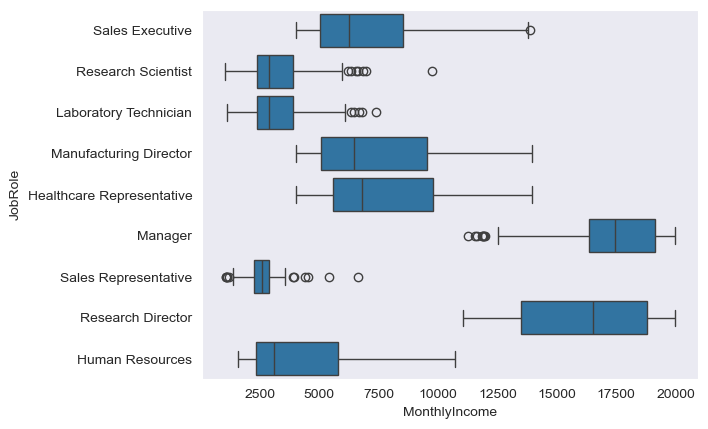

In [75]:
sns.boxplot(data=df, x='MonthlyIncome', y ='JobRole');

#### handle outlier with clip

In [77]:
df[df['JobRole']=='Research Scientist']['MonthlyIncome'].quantile([.25,.5,.75,.9,.95,.99,1])

0.25    2386.00
0.50    2887.50
0.75    3902.50
0.90    4939.90
0.95    5468.35
0.99    6664.72
1.00    9724.00
Name: MonthlyIncome, dtype: float64

In [79]:
df.loc[df['JobRole']=='Research Scientist','MonthlyIncome'] = df.loc[df['JobRole']=='Research Scientist','MonthlyIncome'].clip(upper=6644)

In [81]:
df[df['JobRole']=='Research Scientist']['MonthlyIncome'].quantile([.25,.5,.75,.9,.95,.99,1])

0.25    2386.00
0.50    2887.50
0.75    3902.50
0.90    4939.90
0.95    5468.35
0.99    6644.00
1.00    6644.00
Name: MonthlyIncome, dtype: float64

## Feature Engineering
- scaling
- encoding categorical variables
- dealing with nonlinearity
- dealing with collinearity with dimensional reduction
- trend

### Scaling

In [108]:
import sklearn as sklearn
print("sklearn version :",sklearn.__version__)

sklearn version : 1.4.2


#### MinMaxScaler

In [148]:
from sklearn.preprocessing import MinMaxScaler

In [150]:
scaler = MinMaxScaler()

In [160]:
y = scaler.fit_transform(df['Age'].values.reshape(-1,1))

In [166]:
y.min(), y.max()

(0.0, 0.9999999999999998)

In [170]:
np.histogram(y)

(array([ 57, 105, 224, 265, 255, 217, 131,  92,  77,  47], dtype=int64),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

#### MaxAbsoluteScaler

In [34]:
flight = pd.read_csv('data/flights.csv')
flight.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [179]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

In [187]:
delay_carrier_month = pd.pivot_table(flight, index='carrier',
                       columns='month', 
                       values='dep_delay', 
                       aggfunc='mean')
delay_carrier_month

month,1,2,3,4,5,6,7,8,9,10,11,12
carrier,,,,,,,,,,,,
9E,16.882510,16.486327,13.407530,13.567164,22.672190,28.952978,31.398827,17.296807,7.754232,9.334348,7.564444,19.781088
AA,6.932358,8.276923,8.700291,11.696207,9.664621,14.627778,12.112621,7.169965,5.694272,3.002217,3.102033,11.711427
AS,7.354839,0.722222,8.419355,11.316667,6.774194,13.083333,2.419355,2.870968,-4.516667,0.677419,3.076923,18.018519
B6,9.493436,13.772911,14.240690,15.165175,9.778560,20.392170,24.902315,15.678593,6.634260,2.963065,3.517266,17.004497
DL,3.849768,5.537440,9.933430,8.166544,9.741168,18.735941,20.582242,9.846974,5.526071,3.417502,2.853912,10.790236
EV,24.228879,21.523328,26.169820,22.767549,20.242477,25.496834,26.504722,16.261828,8.237970,13.418050,9.827979,27.887183
F9,10.000000,29.770833,16.754386,24.631579,35.948276,29.436364,31.810345,22.218182,8.263158,9.701754,13.533333,13.147541
FL,1.972222,5.180851,17.252459,13.121311,19.183230,38.806584,41.162698,23.410156,16.948819,13.679487,16.866337,26.105769
HA,54.387097,17.357143,1.161290,-2.100000,-1.451613,1.466667,-1.709677,1.677419,-5.440000,-5.095238,-5.440000,-3.142857


In [345]:
delay_carrier_month.shape

(16, 12)

In [221]:
from sklearn.preprocessing import MaxAbsScaler
abs_scaler = MaxAbsScaler()
yabs = abs_scaler.fit_transform(delay_carrier_month)
yabs.shape

(16, 12)

## Additional: Analyze data

In [347]:
np.argmin(delay_carrier_month,axis=0), np.argmax(delay_carrier_month,axis=0)

(array([13, 10, 10, 10, 10,  8, 10,  8,  8, 10,  8, 10], dtype=int64),
 array([10, 10, 10, 10, 10, 10, 10, 10,  7, 10,  7, 10], dtype=int64))

### error if nan exist

In [350]:
(np.argsort(delay_carrier_month,axis=0))

array([[13,  2,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8],
       [12, 12, 12, 12, 12, 12,  2,  2, 10, 12, 12, 12],
       [ 7,  7,  9,  4,  2,  2, 12, 12,  2,  2, 10, 13],
       [ 4,  4,  2,  2,  1,  1,  1, 13, 12,  3,  4,  4],
       [ 9, 13,  1,  1,  4,  4, 11,  1,  9,  1,  2,  1],
       [ 1, 11, 13,  7,  3, 11,  4,  4,  4,  4,  1,  9],
       [ 2,  9,  4,  0, 11,  3,  9,  9,  1, 13,  9, 15],
       [11,  1, 11, 11,  9,  9, 15, 11,  3,  9,  3,  6],
       [14, 15,  0,  9, 15,  5, 14,  3, 11, 11, 11,  3],
       [ 3, 14,  3, 13, 14, 13,  3,  5, 13,  0,  0, 11],
       [ 6,  3, 14,  3, 13,  0,  5,  0,  0,  6, 13,  2],
       [15,  0,  6, 14,  7,  6,  0, 15,  5, 14,  5,  0],
       [ 0,  8,  7,  5,  5, 14,  6, 14,  6,  5, 15, 14],
       [ 5,  5,  5,  6,  0,  7, 13,  6, 15,  7, 14,  7],
       [ 8,  6, 15, 15,  6, 15,  7,  7, 14, 15,  6,  5],
       [10, 10, 10, 10, 10, 10, 10, 10,  7, 10,  7, 10]], dtype=int64)

### clean nan

In [353]:
delay_clean = np.nan_to_num(delay_carrier_month,nan=0)

In [365]:
np.argmin(delay_clean,axis=0), np.argmax(delay_clean,axis=0)

(array([13, 10, 10,  8,  8,  8,  8,  8,  8,  8,  8,  8], dtype=int64),
 array([10,  6, 15, 15,  6, 10,  7, 10,  7, 15,  7,  5], dtype=int64))

In [367]:
(np.argsort(delay_clean,axis=0))

array([[13, 10, 10,  8,  8,  8,  8,  8,  8,  8,  8,  8],
       [12,  2,  8, 10, 10, 12, 10,  2, 10, 10, 12, 10],
       [ 7, 12, 12, 12, 12,  2,  2, 12,  2, 12, 10, 12],
       [ 4,  7,  9,  4,  2,  1, 12, 13, 12,  2,  4, 13],
       [ 9,  4,  2,  2,  1,  4,  1,  1,  9,  3,  2,  4],
       [ 1, 13,  1,  1,  4, 11, 11,  4,  4,  1,  1,  1],
       [ 2, 11, 13,  7,  3,  3,  4,  9,  1,  4,  9,  9],
       [11,  9,  4,  0, 11,  9,  9, 11,  3, 13,  3, 15],
       [14,  1, 11, 11,  9,  5, 15,  3, 11,  9, 11,  6],
       [ 3, 15,  0,  9, 15, 13, 14,  5, 13, 11,  0,  3],
       [ 6, 14,  3, 13, 14,  0,  3,  0,  0,  0, 13, 11],
       [15,  3, 14,  3, 13,  6,  5, 15,  5,  6,  5,  2],
       [ 0,  0,  6, 14,  7, 14,  0, 14,  6, 14, 15,  0],
       [ 5,  8,  7,  5,  5,  7,  6,  6, 15,  5, 14, 14],
       [ 8,  5,  5,  6,  0, 15, 13,  7, 14,  7,  6,  7],
       [10,  6, 15, 15,  6, 10,  7, 10,  7, 15,  7,  5]], dtype=int64)

### this part: no significant meaning

In [243]:
np.nanmin(yabs, axis=1)

array([ 0.25197776,  0.10346803, -0.26648858,  0.14169307,  0.05745922,
        0.25409107,  0.14925373,  0.02943615, -0.32253596,  0.09679842,
       -0.29153515,  0.12427115,  0.00705234,  0.01587302,  0.13637397,
        0.23650976])

In [245]:
np.nanmax(yabs, axis=1)

array([0.76279807, 0.43141748, 0.64612185, 0.60976028, 0.5000217 ,
       1.        , 1.        , 1.        , 0.81174771, 0.50673302,
       1.        , 0.63551558, 0.22941487, 0.85668277, 0.89269631,
       1.        ])

In [ ]:
yabs_clean = yabs[~np.isnan(yabs)]

In [253]:
np.histogram(yabs_clean)

(array([ 5,  2, 17, 30, 33, 30, 29, 16,  8, 15], dtype=int64),
 array([-0.32253596, -0.19028236, -0.05802876,  0.07422483,  0.20647843,
         0.33873202,  0.47098562,  0.60323921,  0.73549281,  0.8677464 ,
         1.        ]))

### Encoding categorical variables
- binary
- ordinal:integer sequence
- nominal: dummies

#### Data4 (Bank Data)
[back to top](#Lecture5:-Data-Cleansing-and-Feature-Engineering)

In [389]:
df = pd.read_csv('data/bankdata_train.csv',delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### binary

In [395]:
df_binary = df[['default','housing','loan','y']].apply(lambda x: x.map({'yes':1,'no':0}))
df_binary

,default,housing,loan,y
0,0,1,0,0
1,0,1,0,0
2,0,1,1,0
3,0,1,0,0
4,0,0,0,0
...,...,...,...,...
45206,0,0,0,1
45207,0,0,0,1
45208,0,0,0,1
45209,0,0,0,0


In [464]:
df_binary2 = pd.get_dummies(df[['default','housing','loan','y']],
                            drop_first=True,dtype='int32')
df_binary2

,default_yes,housing_yes,loan_yes,y_yes
0,0,1,0,0
1,0,1,0,0
2,0,1,1,0
3,0,1,0,0
4,0,0,0,0
...,...,...,...,...
45206,0,0,0,1
45207,0,0,0,1
45208,0,0,0,1
45209,0,0,0,0


### ordinal

In [450]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [456]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_scaler = OrdinalEncoder()
category = [['unknown', 'primary', 'secondary', 'tertiary']]
arr_ordinal = ordinal_scaler.fit_transform(X=df[['education']],y=category)

In [454]:
arr_ordinal[:10]

array([[2.],
       [1.],
       [1.],
       [3.],
       [3.],
       [2.],
       [2.],
       [2.],
       [0.],
       [1.]])

In [458]:
df[['education']][:10]   # unable to sequencing as desired

,education
0,tertiary
1,secondary
2,secondary
3,unknown
4,unknown
5,tertiary
6,tertiary
7,tertiary
8,primary
9,secondary


use function replace instead

### nominal

In [482]:
pd.get_dummies(df[['marital','job']],dtype='int32')

,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45207,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
45208,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
45209,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


### skewness
- linearize by taking log

In [13]:
df = pd.read_csv('data/HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


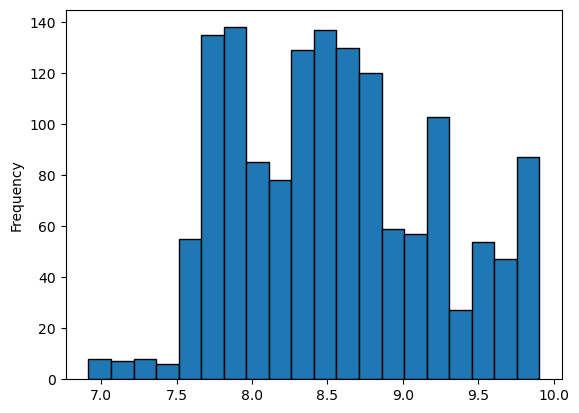

In [23]:
df['MonthlyIncome'].transform(np.log).plot.hist(bins=20,edgecolor='k');

### trend
- long term: regression
- short term: moving average
  - T = m0 - (m1+m2)/2

In [38]:
flight = pd.read_csv('data/flights.csv')

In [54]:
from sklearn.linear_model import LinearRegression
def get_trend(x):
    model = LinearRegression(fit_intercept=True)
    model.fit(x['month'].values.reshape(-1,1),x['dep_delay'])
    return model.coef_[0]

#### long-term trend

In [56]:
CarrierDelay = flight.groupby(['carrier','month'], as_index=False)\
                    .agg({'dep_delay': 'mean'})
CarrierDelay

,carrier,month,dep_delay
0,9E,1,16.882510
1,9E,2,16.486327
2,9E,3,13.407530
3,9E,4,13.567164
4,9E,5,22.672190
...,...,...,...
180,YV,8,19.066667
181,YV,9,8.880952
182,YV,10,20.000000
183,YV,11,10.520833


In [60]:
CarrierDelay.groupby('carrier').apply(get_trend, include_groups=False)

carrier
9E   -0.418426
AA   -0.258390
AS   -0.060284
B6   -0.381353
DL   -0.015583
EV   -0.831682
F9   -0.984410
FL    1.327979
HA   -3.119891
MQ   -0.165304
OO   -6.994523
UA    0.078777
US    0.022896
VX   -0.135073
WN    0.473831
YV   -0.752433
dtype: float64

#### short-term trend

In [65]:
CarrierDelay = flight.groupby(['carrier','month'], as_index=False)\
                    .agg({'dep_delay': 'mean'})\
                    .rename(columns={'dep_delay': 'M0'})

In [67]:
CarrierDelay.head()

,carrier,month,M0
0,9E,1,16.882510
1,9E,2,16.486327
2,9E,3,13.407530
3,9E,4,13.567164
4,9E,5,22.672190


In [79]:
CarrierDelay['M1'] = CarrierDelay.groupby('carrier')['M0'].shift(1)
CarrierDelay['M2'] = CarrierDelay.groupby('carrier')['M0'].shift(2)

In [81]:
CarrierDelay.head()

,carrier,month,M0,M1,M2
0,9E,1,16.882510,NaN,NaN
1,9E,2,16.486327,16.882510,NaN
2,9E,3,13.407530,16.486327,16.882510
3,9E,4,13.567164,13.407530,16.486327
4,9E,5,22.672190,13.567164,13.407530


In [83]:
CarrierDelay['Trend'] = CarrierDelay['M0'] - (CarrierDelay['M1']+CarrierDelay['M2'])/2

In [87]:
CarrierDelay.head()

,carrier,month,M0,M1,M2,Trend
0,9E,1,16.882510,NaN,NaN,NaN
1,9E,2,16.486327,16.882510,NaN,NaN
2,9E,3,13.407530,16.486327,16.882510,-3.276889
3,9E,4,13.567164,13.407530,16.486327,-1.379764
4,9E,5,22.672190,13.567164,13.407530,9.184843
